<a href="https://colab.research.google.com/github/Rattan-kaur-Bajwa/Heart-disease-prediction-system/blob/main/Phase%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phase-2

# **Import all necessary libraries beforehand**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib


In [ ]:
!pip install imbalanced-learn xgboost


#Dataset




In [ ]:
df=pd.read_csv("/content/dataset_heart.zip")

#Missing data values

In [ ]:

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Missing Percentage": missing_percentage})
print(missing_data.sort_values(by="Missing Percentage", ascending=False))


                 Missing Values  Missing Percentage
glucose                     388            9.150943
education                   105            2.476415
BPMeds                       53            1.250000
totChol                      50            1.179245
cigsPerDay                   29            0.683962
BMI                          19            0.448113
heartRate                     1            0.023585
male                          0            0.000000
age                           0            0.000000
currentSmoker                 0            0.000000
prevalentStroke               0            0.000000
prevalentHyp                  0            0.000000
diabetes                      0            0.000000
sysBP                         0            0.000000
diaBP                         0            0.000000
TenYearCHD                    0            0.000000


##Handling Missing Data

###Filling Strategies:

For Numerical Data (e.g., BMI, heartRate) → Use median

In [ ]:
df["BMI"].fillna(df["BMI"].median(), inplace=True)

<ipython-input-6-d9cec340ef99>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BMI"].fillna(df["BMI"].median(), inplace=True)


In [ ]:
df["heartRate"].fillna(df["heartRate"].median(), inplace=True)

<ipython-input-7-7460122ea76b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["heartRate"].fillna(df["heartRate"].median(), inplace=True)


 For Categorical Data (e.g., BPMeds, currentSmoker) → Use mode (most frequent value)

In [ ]:
df["BPMeds"].fillna(df["BPMeds"].mode()[0], inplace=True)

<ipython-input-8-e30129d83a4e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BPMeds"].fillna(df["BPMeds"].mode()[0], inplace=True)


 For Conditional Missing Data (e.g., cigsPerDay) → Fill with median only for smokers, and 0 for non-smokers

In [ ]:
df.loc[df["currentSmoker"] == 1, "cigsPerDay"] = df.loc[df["currentSmoker"] == 1, "cigsPerDay"].fillna(df["cigsPerDay"].median())
df["cigsPerDay"].fillna(0, inplace=True)

<ipython-input-9-7f6dc8de08e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cigsPerDay"].fillna(0, inplace=True)


For Large Missing Data (e.g., glucose) → Use KNN Imputation (advanced method)

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[["glucose", "totChol", "BMI"]] = imputer.fit_transform(df[["glucose", "totChol", "BMI"]])


In [ ]:
# Drop the 'education' column
df.drop(columns=["education"], inplace=True)

# **OutlierS in the Dataset**



In [ ]:
import numpy as np

# Calculate correlation between numerical features and target variable
correlation = df.corr()["TenYearCHD"].sort_values(ascending=False)
print(correlation)


TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.118483
diabetes           0.097344
male               0.088374
BPMeds             0.086448
totChol            0.081628
BMI                0.074326
prevalentStroke    0.061823
cigsPerDay         0.058729
heartRate          0.022851
currentSmoker      0.019448
Name: TenYearCHD, dtype: float64


In [ ]:
num_cols = ["age", "sysBP", "prevalentHyp", "diaBP", "glucose"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [ ]:
low_corr_cols = ["heartRate", "currentSmoker"]

for col in low_corr_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



# Feature Scaling:



In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding target variable)
num_cols = ["age", "sysBP", "diaBP", "glucose", "BMI", "totChol", "heartRate", "cigsPerDay"]

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
df['prevalentHyp'] = df['prevalentHyp'].astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)

# **Feature Selection**

Feature selection is the process of identifying the most important variables in a dataset that contribute to model performance. It helps in:

Reducing overfitting by eliminating irrelevant features.
Improving model accuracy by focusing on relevant data.
Enhancing model efficiency by reducing computation time

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

# Split data for feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply Sequential Feature Selector (Forward Selection)
sfs = SFS(model,
          k_features=8,  # Number of features to select
          forward=True,  # Forward selection
          floating=False,
          scoring='accuracy',
          cv=5)  # 5-fold cross-validation

sfs.fit(X_train, y_train)

# Get selected features
selected_features = list(sfs.k_feature_names_)
print("Selected Features:", selected_features)

# Keep only selected features in the dataset
X_selected = X[selected_features]


Selected Features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


# **Split the Data → Train-test split for evaluation.**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[selected_features]  # Use only selected features from SFS
y = df["TenYearCHD"]       # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (3331, 8)
Testing set size: (833, 8)


### **Cross-Validation**  



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='recall')
print("Random Forest Cross-Validation Recall Scores:", rf_scores)
print("Mean Recall:", rf_scores.mean())


xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)

xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='recall')
print("XGBoost Cross-Validation Recall Scores:", xgb_scores)
print("Mean Recall:", xgb_scores.mean())


Random Forest Cross-Validation Recall Scores: [0.28712871 0.33       0.23       0.35       0.37623762]
Mean Recall: 0.3146732673267326
XGBoost Cross-Validation Recall Scores: [0.43564356 0.44       0.41       0.5        0.46534653]
Mean Recall: 0.4501980198019802


 XGBoost is the better model since it has a higher mean recall (0.45) compared to Random Forest (0.31).

In [23]:
# Train the best model (XGBoost)
best_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
best_model.fit(X_train, y_train)

# Evaluate on Test Set
y_pred = best_model.predict(X_test)
print("\nFinal Model Performance on Test Set:\n", classification_report(y_test, y_pred))

# Save the Best Model
import joblib
joblib.dump(best_model, 'XGBoost_cancer_model.pkl')

print("\nBest Model Selected: XGBoost  Model Saved as 'XGBoost_cancer_model.pkl'")



Final Model Performance on Test Set:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       707
           1       0.23      0.50      0.31       126

    accuracy                           0.67       833
   macro avg       0.56      0.60      0.55       833
weighted avg       0.79      0.67      0.71       833


Best Model Selected: XGBoost  Model Saved as 'XGBoost_cancer_model.pkl'


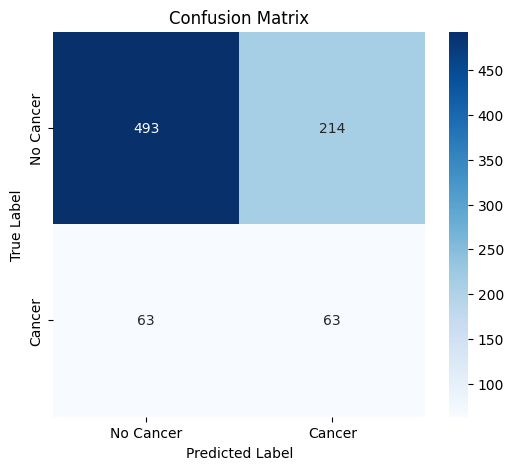

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **Comparing XGBoost vs Random Forest vs Decision Tree**  
Let’s break it down based on key metrics:

| Model               | **Overall Accuracy** | **Class 1 (Cancer) Precision** | **Class 1 (Cancer) Recall** | **Weighted F1-score** | **Observation** |
|---------------------|--------------------|-----------------------------|---------------------------|----------------------|--------------|
| **Random Forest**  | **82%**            | 26%                         | **11%**                   | 79%                  | **High accuracy, but very poor recall for cancer (misses many cases)** |
| **Decision Tree**  | **81%**            | 23%                         | **12%**                   | 78%                  | **Similar to Random Forest, struggles with cancer cases** |
| **XGBoost**        | **67%**            | 23%                         | **50%**                   | 55%                  | **Lower accuracy, but much higher recall for cancer cases (detects more actual cancer cases)** |

### **Which Model is Better?**
 **If the goal is overall accuracy** → **Random Forest** is better (**82% accuracy**).  
 **If the goal is detecting cancer cases (high recall for Class 1)** → **XGBoost** is the better choice (**50% recall** vs **11-12% for others**).  

### **Final Decision**  
**Use XGBoost** if your priority is to reduce false negatives (which is critical for cancer detection).   
 **Avoid Random Forest/Decision Tree**, as they miss too many cancer cases (low recall).  




### What We Did in Phase 2
✔ **Applied SMOTE** to balance the dataset  
✔ **Performed cross-validation** to evaluate models  
✔ **Found that XGBoost performed best in recall (50%) but had low precision (23%)**  
✔ **Selected XGBoost as the final model**  

---

###  Phase 3: Improving Model Performance
Now that we have a working model, **Phase 3 will focus on fine-tuning** to improve performance.  

 **Key Tasks for Phase 3:**  
 **1. Improve Class Balancing** (Refine SMOTE or Try Other Resampling Techniques)  
 **2. Tune XGBoost Hyperparameters** (Optimize `scale_pos_weight`, `max_depth`, `learning_rate`, etc.)  
 goal is detecting cancer cases (high recall for Class 1) → **XGBoost** is the better choice (**50% recall** vs **11-12% for others**).  

### **Final Decision**  
**Use XGBoost** because priority is to reduce false negatives (which is critical for cancer detection).   
 **Avoid Random Forest/Decision Tree**, as they miss too many cancer cases (low recall).  
 **3. Compare SMOTE vs. Cost-Sensitive Learning** (Check if `scale_pos_weight` alone performs better)  
 goal is detecting cancer cases (high recall for Class 1) → **XGBoost** is the better choice (**50% recall** vs **11-12% for others**).  
  
 **4. Reduce False Positives While Keeping Recall High**  

